In [1]:
from numpy import random
import numpy 
import re
import os
import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request
import shutil
from time import sleep
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from random import randint, randrange
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
mainDB=pd.read_csv("Finalized_Data.csv")
secondaryDB=pd.read_csv("Just_Songs.csv")



Text(0.5, 1.0, 'Nirvana Songs')

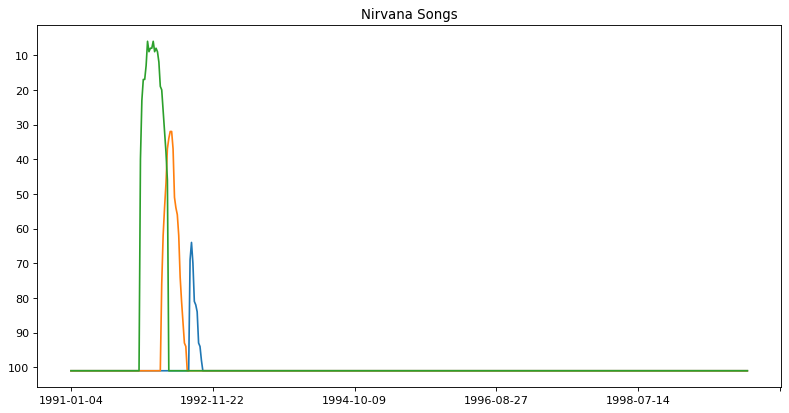

In [4]:
figure(figsize=(12, 6), dpi=80)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis='x', nbins=6)
db=mainDB.loc[mainDB["Current_Year"]<2000]
db=db.loc[mainDB["Current_Year"]>1990]

wantedArtists=["nirvana"]
dbHO=db.loc[db.Artist_Name==wantedArtists[0]]
for artist in wantedArtists[1:]:
    tempDB=db.loc[db.Artist_Name==artist]
    dbHO=dbHO.append(tempDB)

songsPositions=dict()
for index, row in dbHO.iterrows():
    if row['Song_Name'] not in songsPositions:
        #if row["Current_Position"]<21:
            songsPositions[row['Song_Name']]=[[row["Current_Position"],row["Current_Date"]]]
    else:
        #if row["Current_Position"]<21:
            songsPositions[row['Song_Name']].insert(0,[row["Current_Position"],row["Current_Date"]])
    
songs=[]
placements=[]
weeks=[]
overallWeeks=[]
songSRs=dict()
for key,val in songsPositions.items():
    songs.append(key)
    for week in val:
        placements.append(week[0])
        weeks.append(week[1])
    songSRs[key] = pd.Series(placements, index=weeks)
    placements=[]
    weeks=[]
for key,val in songSRs.items():
    zeroes=[]
    extraWeeks=[]
    for week in db["Current_Date"]:
        if week not in val.index and week not in extraWeeks:
            zeroes.append(101)
            extraWeeks.append(week)
    tempSR=pd.Series(zeroes,index=extraWeeks)
    val=val.append(tempSR)
    val=val.sort_index()
    songSRs[key]=val
    songSRs[key].plot(kind="line")
plt.gca().invert_yaxis()
plt.title(label="Nirvana Songs")
#plt.legend(songs)

Text(0.5, 1.0, 'The Beatles Songs')

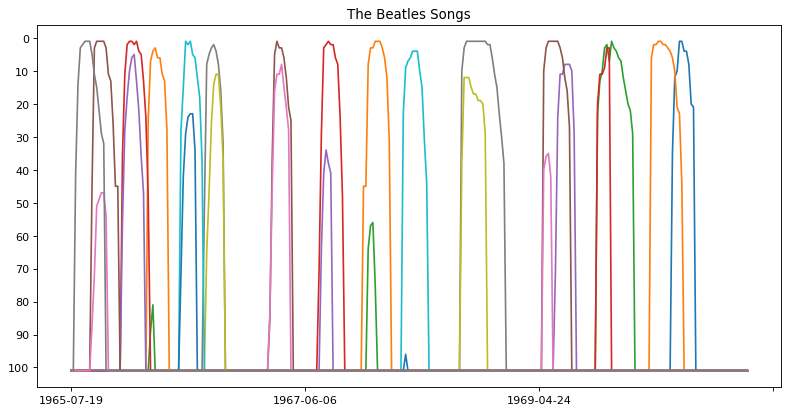

In [6]:
figure(figsize=(12, 6), dpi=80)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis='x', nbins=6)
db=mainDB.loc[mainDB["Current_Year"]<1971]
db=db.loc[mainDB["Current_Year"]>1960]

wantedArtists=["the beatles"]
dbHO=db.loc[db.Artist_Name==wantedArtists[0]]
for artist in wantedArtists[1:]:
    tempDB=db.loc[db.Artist_Name==artist]
    dbHO=dbHO.append(tempDB)

songsPositions=dict()
for index, row in dbHO.iterrows():
    if row['Song_Name'] not in songsPositions:
        #if row["Current_Position"]<21:
            songsPositions[row['Song_Name']]=[[row["Current_Position"],row["Current_Date"]]]
    else:
        #if row["Current_Position"]<21:
            songsPositions[row['Song_Name']].insert(0,[row["Current_Position"],row["Current_Date"]])
    
songs=[]
placements=[]
weeks=[]
overallWeeks=[]
songSRs=dict()
for key,val in songsPositions.items():
    songs.append(key)
    for week in val:
        placements.append(week[0])
        weeks.append(week[1])
    songSRs[key] = pd.Series(placements, index=weeks)
    placements=[]
    weeks=[]
for key,val in songSRs.items():
    zeroes=[]
    extraWeeks=[]
    for week in db["Current_Date"]:
        if week not in val.index and week not in extraWeeks:
            zeroes.append(101)
            extraWeeks.append(week)
    tempSR=pd.Series(zeroes,index=extraWeeks)
    val=val.append(tempSR)
    val=val.sort_index()
    songSRs[key]=val
    songSRs[key].plot(kind="line")
plt.gca().invert_yaxis()
plt.title(label="The Beatles Songs")
#plt.legend(songs)

Text(0.5, 1.0, 'Weeks On Chart')

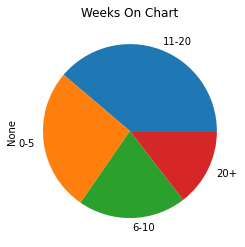

In [7]:
#to visualize weeks on chart
i=[]
for index,rows in secondaryDB.iterrows():
    myReg="(.*)[(]"
    tempName=re.findall(myReg,rows["Song_Name"])[0]
    t=mainDB.loc[mainDB["Song_Name"]==tempName]
    i.append(((len(t["Weeks_OnChart"].value_counts()))))
maxWeeks=pd.Series(data=i)
maxWeeks
maxSeries=maxWeeks.copy()
bins=[0,6,11,21,100]
labels=["0-5","6-10","11-20","20+"]
maxSeries=pd.cut(maxSeries,bins=bins,labels=labels)
maxSeries.value_counts().plot(kind="pie")
plt.title(label="Weeks On Chart")
    

Text(0.5, 1.0, 'Hits Per Artist')

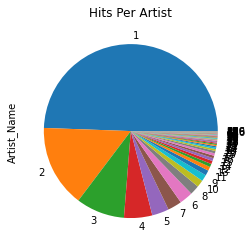

In [8]:
secondaryDB["Artist_Name"].value_counts().value_counts().plot(kind="pie")
plt.title(label="Hits Per Artist")
